In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,  KFold 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.svm import SVC

In [2]:
pwd

'/home/farzaneh/DataScientist/LearnPython/Diabetes'

In [3]:
data = pd.read_csv('diabetes_data_upload.csv', header = 0)

In [4]:
#Shuffle data
data = data.sample(frac=1)

In [5]:
#data.info()

In [6]:
#to see the whole data here
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [7]:
#print(data)

### NAN und ? prüfen

In [8]:
data.isnull().values.any()

#two ways to look for missing values per column 
data.isnull().sum()
data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [9]:
#data.apply(lambda row: row.astype(str).str.contains("NAN?").any(), axis=1)
#print(data.where(data == '?'))

In [10]:
#Q = data.where(data == '?')
#Q.isnull().values.any()

In [11]:
#Get the absolute number of how many instances in our data belong to class Positive
count_positive = len(data.loc[data['class']== 'Positive'])
print('Cases with Positive Diabetes: ' + str(count_positive))

#Get the absolute number of how many instances in our data belong to class one
count_negative = len(data.loc[data['class']== 'Negative'])
print('Cases with Negative Diabetes: ' +str(count_negative))

#Get the relative number of how many instances in our data belong to class zero
percentage_positive = count_positive/(count_negative+count_positive)
print('Cases with Positive Diabetes in percent: {}%'.format(round(percentage_positive,3)*100))

#Get the relative number of how many instances in our data belong to class one
percentage_negative = count_negative/(count_positive+count_negative)
print('Cases with Negative Diabetes in percent: {}%'.format(round(percentage_negative,4)*100))


Cases with Positive Diabetes: 320
Cases with Negative Diabetes: 200
Cases with Positive Diabetes in percent: 61.5%
Cases with Negative Diabetes in percent: 38.46%


In [12]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
477,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Negative
291,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
452,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
385,38,Male,Yes,No,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,Positive
475,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [13]:
X = data.drop(['class'], axis = 1)

In [14]:
y = data['class']

In [15]:
X_conv = pd.get_dummies(X, drop_first=True, dtype=float)

In [16]:
X_conv.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
477,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
291,30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,38,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
385,38,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
475,38,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_conv, y, test_size=0.2, random_state=14)

### Entscheidungsbaum

In [18]:
tree_clf = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=14)

In [19]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=14)

In [20]:
#Shows importances of the attributes according to our model 
tree_clf.feature_importances_

array([0.02710789, 0.1253157 , 0.44922228, 0.10888016, 0.        ,
       0.01417308, 0.        , 0.01634349, 0.        , 0.03356574,
       0.04766259, 0.05309767, 0.        , 0.03032479, 0.09430662,
       0.        ])

In [21]:
score = tree_clf.score(X_test,y_test)
print('Decision Tree scores with {}% accuracy'.format(round(score,4)*100))

Decision Tree scores with 96.15% accuracy


In [22]:
#tree.plot_tree(tree_clf)

In [23]:
#man soll hier mit dem class_names aufpassen, das Programm versteht selber nicht in welche reinfolge gegeben werden soll

In [24]:
export_graphviz(tree_clf,out_file=("Diabetes_tree.dot"), feature_names=X_conv.columns[:],class_names=(['Diabetes Negative','Diabetes Positive']), rounded=True, filled=True)

In [25]:
!dot -Tpng Diabetes_tree.dot -o Diabetes_tree.png

In [26]:
!dot -Tps Diabetes_tree.dot -o Diabetes_tree.ps

### Entscheidungsbaum Optimieren

In [27]:
#tree parameters which shall be tested to optimize hyperparameters
tree_para = {'criterion':['gini','entropy'],'max_depth':[i for i in range(1,6)], 'min_samples_split':[i for i in range (2,20)]}

#GridSearchCV object
grd_clf = GridSearchCV(tree_clf, tree_para, cv=5)

#creates differnt trees with all the differnet parameters out of our data
grd_clf.fit(X_train,y_train)

#best paramters that were found
best_parameters = grd_clf.best_params_  
print(best_parameters)  

#new tree object with best parameters
model_with_best_tree_parameters = grd_clf.best_estimator_

#k_fold object to optimize the accuracy measurement
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

#scores reached with different splits of training/test data 
k_fold_scores = cross_val_score(model_with_best_tree_parameters, X_conv, y, cv=k_fold, n_jobs=1)

#arithmetic mean of accuracy scores 
mean_accuracy_best_parameters_tree = np.mean(k_fold_scores)

print('Accuracy of Decision Tree with best parameters is {}% '.format(round(mean_accuracy_best_parameters_tree, 4)*100))

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy of Decision Tree with best parameters is 93.27% 


### Random Forest

In [28]:
RForest_clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0)
RForest_clf.fit(X_train,y_train)
RForest_clf_score = RForest_clf.score(X_test,y_test)
print('Random Forest Classifier scores with {}% accuracy'.format(round(RForest_clf_score,3)*100))

Random Forest Classifier scores with 93.30000000000001% accuracy


### Random Forest Optimieren

In [29]:
#tree parameters which shall be tested to optimize hyperparameters
forest_para = {'criterion':['gini','entropy'],'n_estimators':[3, 10, 30],'max_depth':[i for i in range(1,6)], 'min_samples_split':[i for i in range (2,10)]}

#GridSearchCV object
forest_grd_clf = GridSearchCV(RForest_clf, forest_para, cv=5) 

#creates differnt trees with all the differnet parameters out of our data
forest_grd_clf.fit(X_train,y_train)

#best paramters that were found
RF_best_parameters = forest_grd_clf.best_params_  
print(RF_best_parameters)  

#new tree object with best parameters
RF_model_with_best_tree_parameters = forest_grd_clf.best_estimator_

#k_fold object to optimize the accuracy measurement
RF_k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

#scores reached with different splits of training/test data 
RF_k_fold_scores = cross_val_score(RF_model_with_best_tree_parameters, X_conv, y, cv=RF_k_fold, n_jobs=1)

#arithmetic mean of accuracy scores 
mean_accuracy_best_parameters_tree = np.mean(RF_k_fold_scores)

print('Accuracy of Random Forest with best parameters is {}% '.format(round(mean_accuracy_best_parameters_tree, 4)*100))

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 10}
Accuracy of Random Forest with best parameters is 93.27% 


### KNN classifier

In [30]:
KNN_clf = neighbors.KNeighborsClassifier(n_neighbors = 4, weights='distance', algorithm='auto',leaf_size=2, p=2, metric='minkowski')
KNN_clf.fit(X_train,y_train)
#man könnte hier auch auf (X_conv,y) trainieren mit dem Optimale Hyperparameter von unten aber dann die Ergebnisse nicht mehr für Test oder ROC benutzt werden kann
KNN_y_pred = KNN_clf.predict(X_test)
confusion_matrix(y_test, KNN_y_pred)
accuracy_KNN = KNN_clf.score(X_test, y_test)
print('Accuracy K neighbors classifier is {}% '.format(round(accuracy_KNN,4)*100))

Accuracy K neighbors classifier is 89.42% 


### KNN Classifier Optimieren

In [31]:
#KNN parameters which shall be tested to optimize hyperparameters
KNN_para = {'n_neighbors':[i for i in range(2,10)],'weights':['uniform','distance'],'leaf_size':[i for i in range(2,30)]}

#GridSearchCV object
KNN_grd_clf = GridSearchCV(KNN_clf, KNN_para, cv=5) 

#creates differnt classifiers with all the differnet parameters out of our data
KNN_grd_clf.fit(X_train,y_train)
#man könnte hier auch auf (X_conv,y) trainieren um dem Optimale Hyperparameter zu finden und den gerechnete Accuranz hier ist das richtige Accuranz

#best paramters that were found
KNN_best_parameters = KNN_grd_clf.best_params_  
print(KNN_best_parameters)  

#new tree object with best parameters
KNN_model_with_best_parameters = KNN_grd_clf.best_estimator_

#k_fold object to optimize the accuracy measurement
KNN_k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

#scores reached with different splits of training/test data 
KNN_k_fold_scores = cross_val_score(KNN_model_with_best_parameters, X_conv, y, cv=KNN_k_fold, n_jobs=1)

#arithmetic mean of accuracy scores 
mean_accuracy_best_parameters_tree = np.mean(KNN_k_fold_scores)

print('Accuracy of KNN with best parameters is {}% '.format(round(mean_accuracy_best_parameters_tree, 4)*100))

{'leaf_size': 2, 'n_neighbors': 4, 'weights': 'distance'}
Accuracy of KNN with best parameters is 91.14999999999999% 


### Support Vector Machine

In [32]:
# instantiate SVC object. Probability parameter needed for ROC-Curve in the next step
#s = SVC(probability = True)

# define parameters for the GridSearchCV: try differnet kernels, different C values and for 'poly','sigmoid' and 'rbf'kernels different gamma vlaues
#parameters = {'kernel':('linear', 'poly','sigmoid','rbf'), 'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],'gamma': (1,2,3,'auto')}

# instantiate GridSearchCV object with its parameters 
#SVM_clf = GridSearchCV(s, parameters, cv=5)
SVM_clf = SVC(kernel='poly', probability = True, C = 0.1, gamma='auto')

# train models
SVM_clf.fit(X_train, y_train)

# check average scores of models
#print("accuracy:"+str(np.average(cross_val_score(SVM_clf, X_train, y_train, scoring='accuracy', cv=5))))
#print("f1:"+str(np.average(cross_val_score(SVM_clf, X_train, y_train, scoring='f1', cv=5))))

#check which model performed best 
#SVM_clf.best_params_
# {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}

SVC(C=0.1, gamma='auto', kernel='poly', probability=True)

In [33]:
#new tree object with best parameters
#SVM_model_with_best_parameters = SVM_clf.best_estimator_

#k_fold object to optimize the accuracy measurement
#SVM_k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

#scores reached with different splits of training/test data 
#SVM_k_fold_scores = cross_val_score(SVM_model_with_best_parameters, X_conv, y, cv=SVM_k_fold, scoring='accuracy', n_jobs=1)

#arithmetic mean of accuracy scores 
#mean_accuracy_best_parameters_tree = np.mean(SVM_k_fold_scores)

#print('Accuracy of SVM with best parameters is {}% '.format(round(mean_accuracy_best_parameters_tree, 4)*100))

In [34]:
# instantiate new objct with best parameters for our data
best_params_svm = SVC(kernel='poly', probability = True, C = 0.1, gamma='auto')

# get predictions
SVM_y_pred = SVM_clf.predict(X_test)

In [35]:
#confusion matrix
Diabetes_conf_matrix = confusion_matrix(y_test, SVM_y_pred)
print('Confusion Matrix: ')
print(Diabetes_conf_matrix)

Confusion Matrix: 
[[34  0]
 [ 2 68]]


### ROC-Curve, AUROC 

SVM AUROC = 0.9890756302521009 ;KNN AUROC = 0.9577731092436974 ;Random Forest AUROC = 0.9953781512605042 ;Decision Tree AUROC = 0.9867647058823529


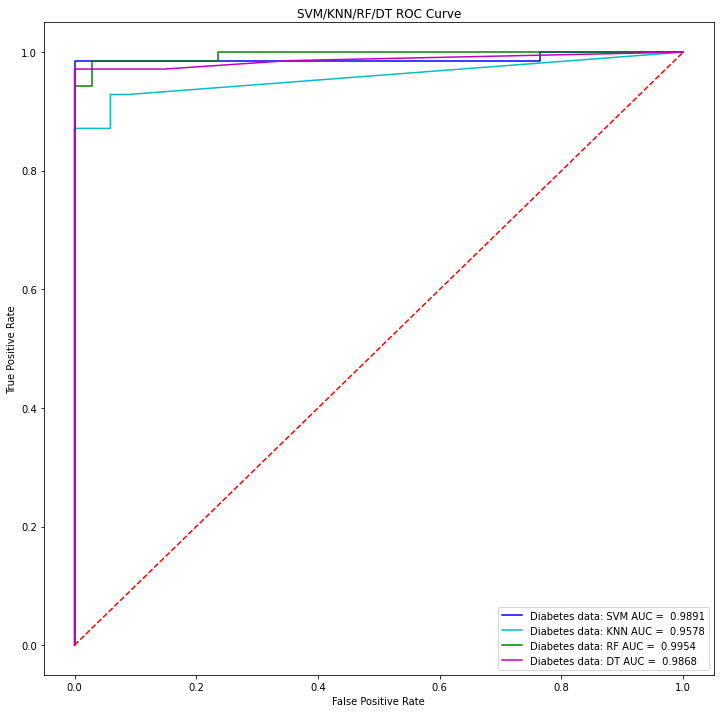

In [38]:
# get probabilities of class membership of test instances
SVM_probs = SVM_clf.predict_proba(X_test)
KNN_probs = KNN_grd_clf.predict_proba(X_test)
RForest_probs = forest_grd_clf.predict_proba(X_test)
DT_probs = grd_clf.predict_proba(X_test)

#get col with positive probabilities
y_pred_proba = SVM_probs[:,1]
y_pred_KNN = KNN_probs[:,1]
y_pred_RForest = RForest_probs[:,1]
y_pred_DT = DT_probs[:,1]

# set y_test positive to 1 and negative to 0 
y_conv = pd.get_dummies(y_test, drop_first=True, dtype=float)

# get false positive rate, true positive rate and threshold values
fpr, tpr, threshold = roc_curve(y_conv, y_pred_proba, pos_label=1)
KNN_fpr, KNN_tpr, KNN_threshold = roc_curve(y_conv, y_pred_KNN, pos_label=1)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_conv, y_pred_RForest, pos_label=1)
DT_fpr, DT_tpr, DT_threshold = roc_curve(y_conv, y_pred_DT, pos_label=1)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
KNN_roc_auc = auc(KNN_fpr, KNN_tpr)
RF_roc_auc = auc(RF_fpr, RF_tpr)
DT_roc_auc = auc(DT_fpr, DT_tpr)
print('SVM AUROC =',roc_auc, ';KNN AUROC =',KNN_roc_auc, ';Random Forest AUROC =',RF_roc_auc, ';Decision Tree AUROC =',DT_roc_auc)

#define figure size 
plt.figure(figsize=(12,12))

#add title
plt.title('SVM/KNN/RF/DT ROC Curve')

# plot and add labels to plot
plt.plot(fpr, tpr, 'b', label = 'Diabetes data: SVM AUC =  ' + str(round(roc_auc,4)))
plt.plot(KNN_fpr, KNN_tpr, 'c', label = 'Diabetes data: KNN AUC =  ' + str(round(KNN_roc_auc,4)))
plt.plot(RF_fpr, RF_tpr, 'g', label = 'Diabetes data: RF AUC =  ' + str(round(RF_roc_auc,4)))
plt.plot(DT_fpr, DT_tpr, 'm', label = 'Diabetes data: DT AUC =  ' + str(round(DT_roc_auc,4)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()